In [23]:
%pip install pandas nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dream\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import os

In [4]:
os.chdir("C:\\Users\\dream\\Downloads")


In [5]:
df=pd.read_csv("generic_sentiment_dataset_50k.csv")

In [6]:
df

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\n2. No lag\n3. This is my fi...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0
...,...,...,...
49995,positive,good display..good battery...awsm perfomace..i...,2
49996,negative,bad phone,0
49997,neutral,Fingerprint does not work properly,1
49998,negative,Bakbass phone ever. Camera quality just 2 mp c...,0


In [7]:
df.head()

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\n2. No lag\n3. This is my fi...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0


In [8]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [9]:
# Function to classify sentiment based on compound score
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [10]:
# Remove rows where 'text' is NaN or convert NaNs to empty strings
df['text'] = df['text'].fillna('')  # Fill NaNs with empty strings

# Apply the sentiment function to the 'text' column again
df['predicted_sentiment'] = df['text'].apply(get_sentiment)

# Display the first few rows with predicted sentiments
df[['text', 'sentiment', 'predicted_sentiment']].head()


,text,sentiment,predicted_sentiment
0,good mobile. battery is 5000 mah is very big. ...,positive,positive
1,Overall in hand ecpirience is quite good matt ...,positive,positive
2,"1. Superb Camera,\n2. No lag\n3. This is my fi...",positive,negative
3,Bigger size of application names doesn't allow...,positive,negative
4,Just a hype of stock android which is not flaw...,negative,negative


In [11]:
# Modified function to handle NaN or non-string inputs
def get_sentiment(text):
    if isinstance(text, str):  # Check if the text is a string
        scores = sid.polarity_scores(text)
        compound_score = scores['compound']
        if compound_score >= 0.05:
            return 'positive'
        elif compound_score <= -0.05:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'neutral'  # You can decide on a default return value for non-strings

# Apply the sentiment function to the 'text' column again
df['predicted_sentiment'] = df['text'].apply(get_sentiment)

# Display the first few rows with predicted sentiments
df[['text', 'sentiment', 'predicted_sentiment']].head()


,text,sentiment,predicted_sentiment
0,good mobile. battery is 5000 mah is very big. ...,positive,positive
1,Overall in hand ecpirience is quite good matt ...,positive,positive
2,"1. Superb Camera,\n2. No lag\n3. This is my fi...",positive,negative
3,Bigger size of application names doesn't allow...,positive,negative
4,Just a hype of stock android which is not flaw...,negative,negative


In [12]:
# Apply the sentiment function to the 'text' column
df['predicted_sentiment'] = df['text'].apply(get_sentiment)

# Display the first few rows with predicted sentiments
df[['text', 'sentiment', 'predicted_sentiment']].head()


,text,sentiment,predicted_sentiment
0,good mobile. battery is 5000 mah is very big. ...,positive,positive
1,Overall in hand ecpirience is quite good matt ...,positive,positive
2,"1. Superb Camera,\n2. No lag\n3. This is my fi...",positive,negative
3,Bigger size of application names doesn't allow...,positive,negative
4,Just a hype of stock android which is not flaw...,negative,negative


In [13]:
# Compare the original sentiment with the predicted sentiment
df['correct'] = df['sentiment'] == df['predicted_sentiment']

# Calculate accuracy
accuracy = df['correct'].mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 66.52%


In [14]:
# Save the results to a new CSV file
df.to_csv('sentiment_analysis_results.csv', index=False)


In [15]:
# Continue with training and testing the sentiment analysis model

# Re-import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score



In [16]:
# Step 1: Data Preparation
# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'].astype(str))  # Features
y = df['sentiment']  # Target labels

In [17]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Step 3: Model Training
model = MultinomialNB()  # Using Naive Bayes classifier
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
# Step 4: Model Testing
y_pred = model.predict(X_test)

In [20]:
# Step 5: Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.72      0.71      2810
     neutral       0.46      0.23      0.31      1944
    positive       0.76      0.88      0.82      5246

    accuracy                           0.71     10000
   macro avg       0.64      0.61      0.61     10000
weighted avg       0.68      0.71      0.69     10000

Confusion Matrix:
 [[2032  259  519]
 [ 559  449  936]
 [ 341  268 4637]]


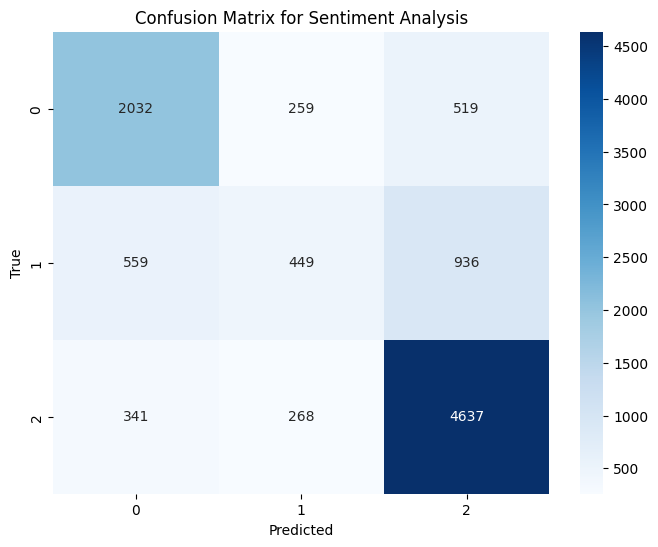

In [21]:
# Step 6: Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Sentiment Analysis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you have already trained the model and have predictions 'y_pred' and true labels 'y_test'
# Display the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision and accuracy values
precision_positive = report['positive']['precision']
precision_negative = report['negative']['precision']
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision (Positive): {precision_positive:.2f}")
print(f"Precision (Negative): {precision_negative:.2f}")
print(f"Overall Accuracy: {accuracy:.2f}")

# Print the full classification report
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))


Precision (Positive): 0.76
Precision (Negative): 0.69
Overall Accuracy: 0.71

Detailed Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.72      0.71      2810
     neutral       0.46      0.23      0.31      1944
    positive       0.76      0.88      0.82      5246

    accuracy                           0.71     10000
   macro avg       0.64      0.61      0.61     10000
weighted avg       0.68      0.71      0.69     10000

